In [48]:
#M2 - W2 Assignment: Visualize your data
#Luke Barry
#Dec.13th, 2020

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 100000

In [6]:
df = pd.read_csv('test.csv')
print(df.head(5))

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0   

In [7]:
df.Age =sorted(df.Age)
df.City_Category= sorted(df.City_Category)
df.Stay_In_Current_City_Years=sorted(df.Stay_In_Current_City_Years)
df.Occupation=sorted(df.Occupation)

In [8]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [9]:
#Male, Female, and Title Colors
m_color = '#273459'
f_color = '#BF5A89'
t_color = '#5DA614'

Text(0.5, 1.0, "Percentage of Respondant's Gender")

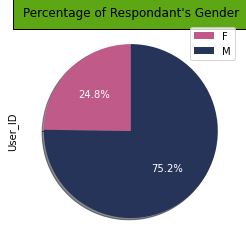

In [10]:
#I wanted to see what product categories were most poular for each gender, but first wanted to see how much of the respondants were of each gender.
#3/4 of Black Friday shoppers appoear to be male.
#An assumption could be that females are sending their husband's out since Black Friday shopping is known to be ruthless
#(Some people have died being trampled to death by Black Friday crowds)

colors = [f_color, m_color]
df.groupby(['Gender']).sum().plot(kind='pie', y='User_ID', shadow = True, autopct='%1.1f%%', textprops={'color':"w"}, colors=colors, startangle=90)
plt.title("Percentage of Respondant's Gender", bbox={'facecolor': t_color, 'alpha': 1, 'pad': 10})

Text(0.5, 1.0, "Percentage of Respondant's Marital Status")

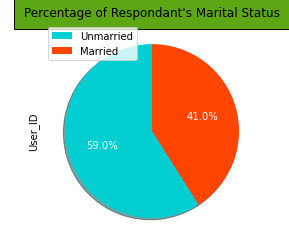

In [11]:
#To test the above assumption, I wanted to see what percentage of the respondants were married. 
#Given that well under 50% of the respondants were married, it is unlikely the higher number of males were motivated by pressure from their spouses.

colors = ['darkturquoise', 'orangered']
labels = 'Unmarried', 'Married'
df.groupby(['Marital_Status']).sum().plot(kind='pie', y="User_ID", shadow = True, autopct='%1.1f%%', labels=labels, textprops={'color':"w"}, colors=colors, startangle=90)
plt.title("Percentage of Respondant's Marital Status", bbox={'facecolor': t_color, 'alpha': 1, 'pad': 10})

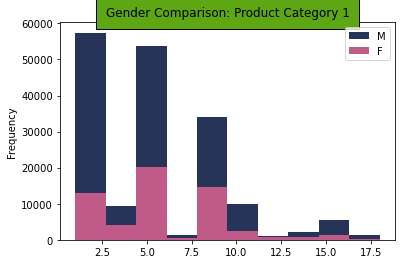

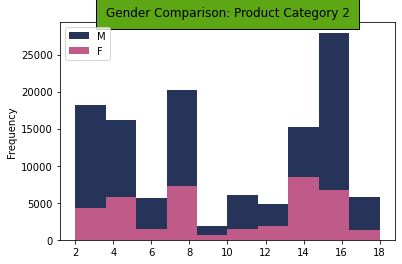

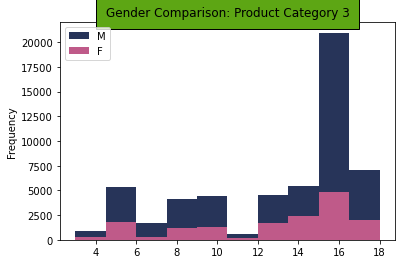

In [12]:
#To investigate further, I wanted to see if the types of products being offered were related to the higher amount of male shoppers.
#There seems to be no correlation here either, as prducts that are popular with males also seem to be more popular amongsts females as well.
#The exception being product 14 in category 2, which appears to be slightly more popular with females, relitevely.

df[df["Gender"]=="M"]["Product_Category_1"].plot(kind='hist', bins=10, color=m_color, alpha = 1)
df[df["Gender"]=="F"]["Product_Category_1"].plot(kind='hist', bins=10, color=f_color, alpha = 1)
plt.legend(["M", "F"])
plt.title("Gender Comparison: Product Category 1", bbox={'facecolor': t_color, 'alpha': 1, 'pad': 10})
plt.show()

df[df["Gender"]=="M"]["Product_Category_2"].plot(kind='hist', bins=10, color=m_color, alpha = 1)
df[df["Gender"]=="F"]["Product_Category_2"].plot(kind='hist', bins=10, color=f_color, alpha = 1)
plt.title("Gender Comparison: Product Category 2", bbox={'facecolor': t_color, 'alpha': 1, 'pad': 10})
plt.legend(["M", "F"])
plt.show()

df[df["Gender"]=="M"]["Product_Category_3"].plot(kind='hist', bins=10, color=m_color, alpha = 1)
df[df["Gender"]=="F"]["Product_Category_3"].plot(kind='hist', bins=10, color=f_color, alpha = 1)
plt.title("Gender Comparison: Product Category 3", bbox={'facecolor': t_color, 'alpha': 1, 'pad': 10})
plt.legend(["M", "F"])
plt.show()

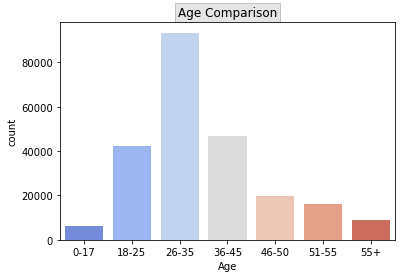

In [13]:
#I was also interested in seeing which age groups were involved in the survey, with ages 26-35 being significantly higher than the rest.
#This would effect the types of products that are being sought after.
sns.countplot(x="Age", palette = "coolwarm", data=df)
plt.title("Age Comparison", bbox={'facecolor': 'gray', 'alpha': .2, 'pad': 3})
plt.show()

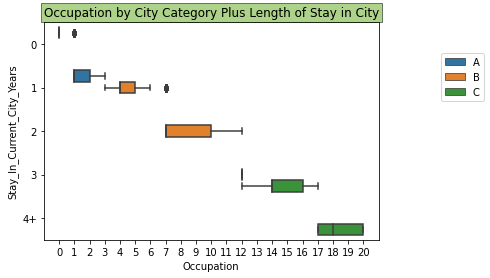

In [14]:
#I wanted to see if there is a relationship between the types of jobs respondants had, their city category, and how long they've been in the city
#There appears to be a relationship between the City Category, Amount of Years in Current City, and Occupation
#More data would be needed to determing what this relationship could mean.
sns.boxplot(x="Occupation", palette = "tab10", y="Stay_In_Current_City_Years", hue="City_Category", data=df)
plt.title("Occupation by City Category Plus Length of Stay in City", bbox={'facecolor': t_color, 'alpha': 0.5, 'pad': 3})
x_ticks = np.arange(0, 21, 1)
plt.xticks(x_ticks)
plt.legend(loc='center', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.show()